## 其他參考
`Choice models (CM) `

In [23]:
import ipystata
# from ipystata.config import config_stata  
# config_stata('c:/program files/stata17/statamp-64.exe', force_batch=True) #如果要//註解可以作用,要這行

## 範例1

In [24]:
%%stata
use https://stats.idre.ucla.edu/stat/stata/dae/binary.dta, clear
codebook

. use https://stats.idre.ucla.edu/stat/stata/dae/binary.dta, clear

. codebook

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
admit                                                                                                                                                                                        (unlabeled)
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

                  Type: Numeric (float)

                 Range: [0,1]                         Units: 1
         Unique values: 2                         Missing .: 0/400

            Tabulation: Freq.  Value
                          273  0
                          127  1

----------------------------------------

- GRE (Graduate Record Exam scores)
- GPA (grade point average) and 
- rank: prestige of the undergraduate institution
- admit

- odd : \\(  \frac{p}{1-p}  \\)
- log odd : \\( log \frac{p}{1-p} \\)
- \\( p = \frac{odd}{1+odd} =\frac{exp(log odd)}{1+exp(log odd)} \\)

令\\(  P=\frac{e^{β_0+β_1 x_1+⋯+β_m x_m }}{1+e^{β_0+β_1 x_1+⋯+β_m x_m } }  \\)，定義 \\( logit P=ln⁡(P/(1-P))  \\)，則mutiple logistic 迴歸模型定義
$$logit P=ln\frac{P}{1-P} = β_0+β_1 x_1+⋯+β_m x_m=β'x $$

對照上面的P

. twoway function y=exp(x)/(1+exp(x)), range(-10 10)



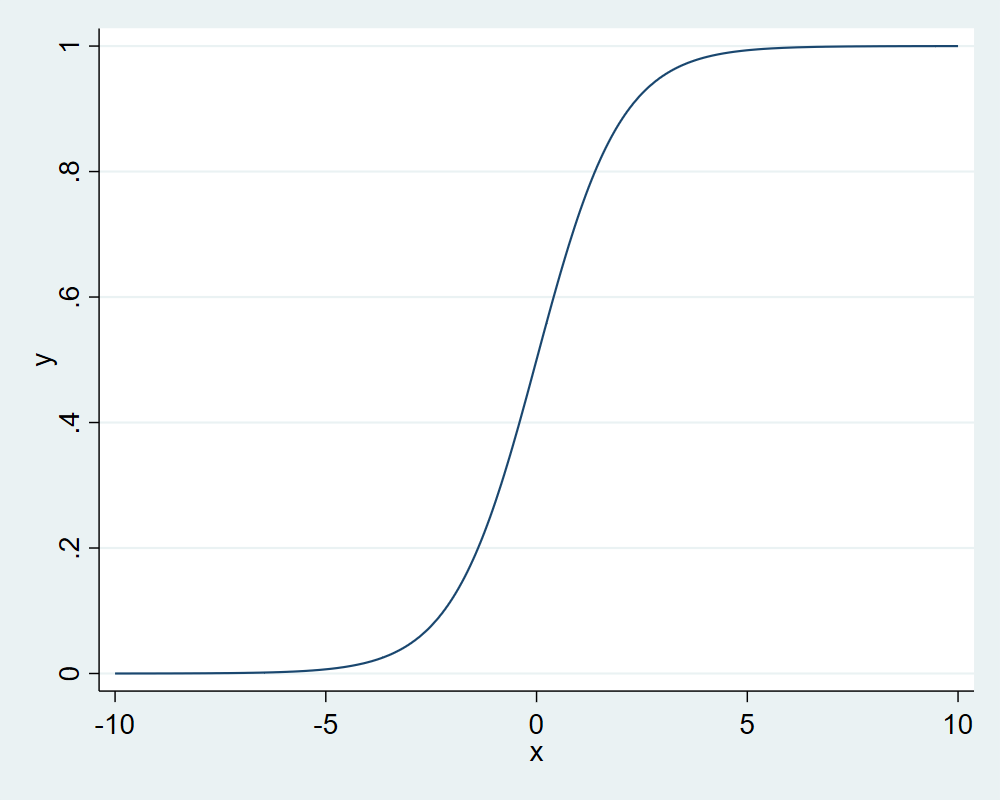

In [25]:
%%stata 
*這裡的x是log odd
twoway function y=exp(x)/(1+exp(x)), range(-10 10)

In [26]:
%%stata
logit admit gre gpa i.rank

. logit admit gre gpa i.rank

Iteration 0:   log likelihood = -249.98826  
Iteration 1:   log likelihood = -229.66446  
Iteration 2:   log likelihood = -229.25955  
Iteration 3:   log likelihood = -229.25875  
Iteration 4:   log likelihood = -229.25875  

Logistic regression                                     Number of obs =    400
                                                        LR chi2(5)    =  41.46
                                                        Prob > chi2   = 0.0000
Log likelihood = -229.25875                             Pseudo R2     = 0.0829

------------------------------------------------------------------------------
       admit | Coefficient  Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
         gre |   .0022644    .001094     2.07   0.038     .0001202    .0044086
         gpa |   .8040377   .3318193     2.42   0.015     .1536838    1.454392
             |
        rank |
  

- The `likelihood ratio chi-square` of41.46 with a p-value of 0.0001 tells us that our model as a whole fits significantly
better than an empty model (i.e., a model with no predictors).
- In the table
    Both gre and gpa are statistically significant, as are the three indicator variables for rank. The logistic regression coefficients give the change in the log odds of the outcome for a one unit increase in the predictor variable.

    For every one unit change in gre, the `log odds` of admission (versus non-admission)`  increases by 0.002.

    For a one unit increase in gpa, the `log odds` of being admitted to graduate school increases by 0.804.

    The indicator variables for rank have a slightly different interpretation. For example, having attended an undergraduate institution with rank of 2, versus an institution with a rank of 1, decreases the log odds of admission by 0.675.

## 範例2


In [27]:
%%stata

use https://rmilab.nkust.edu.tw/files/bookdata/lecture/nhanes2f.dta,clear
keep if !missing(diabetes,black,female,age,age2,agegrp)
label variable age2 "age squared"

* 產生dummy
tab1 agegrp, gen(agegrp) 
gen femage = female*age
label variable femage "female * age interaction"
sum diabetes black female age age2 femage,separator(6)


. use https://rmilab.nkust.edu.tw/files/bookdata/lecture/nhanes2f.dta,clear

. keep if !missing(diabetes,black,female,age,age2,agegrp)
(2 observations deleted)

. label variable age2 "age squared"

. 
. tab1 agegrp, gen(agegrp) 

-> tabulation of agegrp  

 Age groups |
        1-6 |      Freq.     Percent        Cum.
------------+-----------------------------------
   age20-29 |      2,320       22.45       22.45
   age30-39 |      1,620       15.67       38.12
   age40-49 |      1,269       12.28       50.40
   age50-59 |      1,289       12.47       62.87
   age60-69 |      2,852       27.60       90.47
    age 70+ |        985        9.53      100.00
------------+-----------------------------------
      Total |     10,335      100.00

. gen femage = female*age

. label variable femage "female * age interaction"

. sum diabetes black female age age2 femage,separator(6)

    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------

### Model 1: Basic Model


In [28]:
%%stata
logit diabetes black female age,nolog

. logit diabetes black female age,nolog

Logistic regression                                     Number of obs = 10,335
                                                        LR chi2(3)    = 374.17
                                                        Prob > chi2   = 0.0000
Log likelihood = -1811.9828                             Pseudo R2     = 0.0936

------------------------------------------------------------------------------
    diabetes | Coefficient  Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
       black |   .7179046   .1268061     5.66   0.000     .4693691      .96644
      female |   .1545569   .0942982     1.64   0.101    -.0302642    .3393779
         age |   .0594654   .0037333    15.93   0.000     .0521484    .0667825
       _cons |  -6.405437   .2372224   -27.00   0.000    -6.870384    -5.94049
------------------------------------------------------------------------------



Among other things, the results show that getting older is bad for your health – but just how bad is it???
Adjusted predictions (aka predictive margins) can make these results more tangible.
With adjusted predictions, you specify values for each of the independent variables in the model, and then compute the probability of the event occurring for an individual who has those values



In [29]:
%%stata
margins, at(age=(20 70)) atmeans vsquish 

. margins, at(age=(20 70)) atmeans vsquish

Adjusted predictions                                    Number of obs = 10,335
Model VCE: OIM

Expression: Pr(diabetes), predict()
1._at: black  = .1050798 (mean)
       female = .5250121 (mean)
       age    =       20
2._at: black  = .1050798 (mean)
       female = .5250121 (mean)
       age    =       70

------------------------------------------------------------------------------
             |            Delta-method
             |     Margin   std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
         _at |
          1  |   .0063084   .0009888     6.38   0.000     .0043703    .0082465
          2  |   .1104379    .005868    18.82   0.000     .0989369     .121939
------------------------------------------------------------------------------



##	Different Types of Adjusted Predictions
There are at least three common approaches for computing adjusted predictions
APMs (Adjusted Predictions at the Means).  上面討論的案例
AAPs (Average Adjusted Predictions)
APRs (Adjusted Predictions at Representative values)


##	model 2


In [30]:
%%stata
logit diabetes i.black i.female age, nolog


. logit diabetes i.black i.female age, nolog

Logistic regression                                     Number of obs = 10,335
                                                        LR chi2(3)    = 374.17
                                                        Prob > chi2   = 0.0000
Log likelihood = -1811.9828                             Pseudo R2     = 0.0936

------------------------------------------------------------------------------
    diabetes | Coefficient  Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
     1.black |   .7179046   .1268061     5.66   0.000     .4693691      .96644
    1.female |   .1545569   .0942982     1.64   0.101    -.0302642    .3393779
         age |   .0594654   .0037333    15.93   0.000     .0521484    .0667825
       _cons |  -6.405437   .2372224   -27.00   0.000    -6.870384    -5.94049
------------------------------------------------------------------------------



In [31]:
%%stata
margins black female, atmeans

. margins black female, atmeans

Adjusted predictions                                    Number of obs = 10,335
Model VCE: OIM

Expression: Pr(diabetes), predict()
At: 0.black  = .8949202 (mean)
    1.black  = .1050798 (mean)
    0.female = .4749879 (mean)
    1.female = .5250121 (mean)
    age      = 47.56584 (mean)

------------------------------------------------------------------------------
             |            Delta-method
             |     Margin   std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
       black |
          0  |   .0294328   .0020089    14.65   0.000     .0254955    .0333702
          1  |   .0585321   .0067984     8.61   0.000     .0452076    .0718566
             |
      female |
          0  |   .0292703   .0024257    12.07   0.000      .024516    .0340245
          1  |   .0339962   .0025912    13.12   0.000     .0289175    .0390748
-------------------------------------------

### MEM(Margin Effect at Mean)

In [32]:
%%stata
margins, dydx(black female) atmeans

. margins, dydx(black female) atmeans

Conditional marginal effects                            Number of obs = 10,335
Model VCE: OIM

Expression: Pr(diabetes), predict()
dy/dx wrt:  1.black 1.female
At: 0.black  = .8949202 (mean)
    1.black  = .1050798 (mean)
    0.female = .4749879 (mean)
    1.female = .5250121 (mean)
    age      = 47.56584 (mean)

------------------------------------------------------------------------------
             |            Delta-method
             |      dy/dx   std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
     1.black |   .0290993   .0066198     4.40   0.000     .0161246    .0420739
    1.female |   .0047259   .0028785     1.64   0.101    -.0009158    .0103677
------------------------------------------------------------------------------
Note: dy/dx for factor levels is the discrete change from the base level.




The results tell us that, if you had two otherwise-average individuals, one white, one black, the black’s probability of having diabetes would be 2.9 percentage points higher (`Black APM = .0585, white APM = .0294, MEM = .0585 - .0294 = .029`).

And what do we mean by average? With APMs & MEMs, average is defined as having the mean value for the other independent variables in the model, i.e. 47.57 years old, 10.5 percent black, and 52.5 percent female.

So, if we didn’t have the margins command, we could compute the APMs and the MEM for race as follows. Just plug in the values for the coefficients from the logistic regression and the mean values for the variables other than race.



In [33]:
%%stata
scalar female_mean=0.5250121
scalar age_mean = 47.56584
scalar arace=0
scalar wlogodds=_b[1.black]*arace+_b[1.female]*female_mean+_b[age]*age_mean+_b[_cons]
scalar wodds = exp(wlogodds)
scalar wapm=wodds/(1+wodds)
di "White APM = " wapm
scalar blogodds = _b[1.black]*1 + _b[1.female]*female_mean+_b[age]*age_mean+_b[_cons]
scalar bodds = exp(blogodds)
scalar bapm = bodds/(1+bodds)
di "Black APM = "bapm
di "MEM for black = " bapm-wapm


. scalar female_mean=0.5250121

. scalar age_mean = 47.56584

. scalar arace=0

. scalar wlogodds=_b[1.black]*arace+_b[1.female]*female_mean+_b[age]*age_mean+_b[_cons]

. scalar wodds = exp(wlogodds)

. scalar wapm=wodds/(1+wodds)

. di "White APM = " wapm
White APM = .02943284

. scalar blogodds = _b[1.black]*1 + _b[1.female]*female_mean+_b[age]*age_mean+_b[_cons]

. scalar bodds = exp(blogodds)

. scalar bapm = bodds/(1+bodds)

. di "Black APM = "bapm
Black APM = .05853209

. di "MEM for black = " bapm-wapm
MEM for black = .02909925



In [34]:
%%stata
di "White APM = " wapm
di "Black APM = "bapm
di "MEM for black = " bapm-wapm

. di "White APM = " wapm
White APM = .02943284

. di "Black APM = "bapm
Black APM = .05853209

. di "MEM for black = " bapm-wapm
MEM for black = .02909925



MEMs are easy to explain. They have been widely used.  

But, many do not like MEMs. While there are people who are 47.57 years old, there is nobody who is 10.5 percent black or 52.5 percent female. 

Further, the means are only one of many possible sets of values that could be used – and a set of values that no real person could actually have seems troublesome.

For these and other reasons, many researchers prefer AAPs & AMEs.
####	AAPs - Average Adjusted Predictions


In [35]:
%%stata  
margins black female


. margins black female

Predictive margins                                      Number of obs = 10,335
Model VCE: OIM

Expression: Pr(diabetes), predict()

------------------------------------------------------------------------------
             |            Delta-method
             |     Margin   std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
       black |
          0  |   .0443248   .0020991    21.12   0.000     .0402107    .0484389
          1  |    .084417   .0084484     9.99   0.000     .0678585    .1009756
             |
      female |
          0  |   .0446799   .0029119    15.34   0.000     .0389726    .0503871
          1  |   .0514786    .002926    17.59   0.000     .0457436    .0572135
------------------------------------------------------------------------------



####	AMEs – Average Marginal Effects

In [36]:
%%stata
margins,dydx(black female)

. margins,dydx(black female)

Average marginal effects                                Number of obs = 10,335
Model VCE: OIM

Expression: Pr(diabetes), predict()
dy/dx wrt:  1.black 1.female

------------------------------------------------------------------------------
             |            Delta-method
             |      dy/dx   std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
     1.black |   .0400922   .0087055     4.61   0.000     .0230297    .0571547
    1.female |   .0067987   .0041282     1.65   0.100    -.0012924    .0148898
------------------------------------------------------------------------------
Note: dy/dx for factor levels is the discrete change from the base level.




Intuitively, the AME for black is computed as follows:

Go to the first case. Treat that person as though s/he were white, regardless of what the person’s race actually is. Leave all other independent variable values as is. Compute the probability this person (if he or she were white) would have diabetes

Now do the same thing, this time treating the person as though they were black. 

The difference in the two probabilities just computed is the marginal effect for that case

Repeat the process for every case in the sample

Compute the average of all the marginal effects you have computed. This gives you the AME for black.


In [37]:
%%stata
capture clonevar xblack=black
quietly logit diabetes i.xblack i.female age, nolog
margins,dydx(xblack)
replace xblack=0
capture drop adjpredwhite
predict adjpredwhite
replace xblack=1
capture drop adjpredblack
predict adjpredblack
gen meblack=adjpredblack-adjpredwhite
sum adjpredwhite adjpredblack meblack


. capture clonevar xblack=black

. quietly logit diabetes i.xblack i.female age, nolog

. margins,dydx(xblack)

Average marginal effects                                Number of obs = 10,335
Model VCE: OIM

Expression: Pr(diabetes), predict()
dy/dx wrt:  1.xblack

------------------------------------------------------------------------------
             |            Delta-method
             |      dy/dx   std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
    1.xblack |   .0400922   .0087055     4.61   0.000     .0230297    .0571547
------------------------------------------------------------------------------
Note: dy/dx for factor levels is the discrete change from the base level.

. replace xblack=0
(1,086 real changes made)

. capture drop adjpredwhite

. predict adjpredwhite
(option pr assumed; Pr(diabetes))

. replace xblack=1
(10,335 real changes made)

. capture drop adjpredblack

. predict adjpred


	上面的討論
In effect, you are comparing two hypothetical populations – one all white, one all black – that have the exact same values on the other independent variables in the model.

Since the only difference between these two populations is their race, race must be the cause of the differences in their likelihood of diabetes.

Many people like the fact that all of the data is being used, not just the means, and feel that this leads to superior estimates.

Others, however, are not convinced that treating men as though they are women, and women as though they are men, really is a better way of computing marginal effects.

The biggest problem with both of the last two approaches, however, may be that they only produce a single estimate of the marginal effect. However “average” is defined, averages can obscure difference in effects across cases.

In reality, the effect that variables like race have on the probability of success varies with the characteristics of the person, e.g. racial differences could be much greater for older people than for younger.

If we really only want a single number for the effect of race, we might as well just estimate an OLS regression, as OLS coefficients and AMEs are often very similar to each other.
APRs (Adjusted Predictions at Representative values) & MERs (Marginal Effects at Representative Values) may therefore often be a superior alternative. 

APRs/MERs can be both intuitively meaningful, while showing how the effects of variables vary by other characteristics of the individual.

With APRs/MERs, you choose ranges of values for one or more variables, and then see how the marginal effects differ across that range.

####	APRs – Adjusted Predictions at Representative values


In [38]:
%%stata
quietly logit diabetes i.black i.female age, nolog
margins black, at(age=(20 30 40 50 60 70)) vsquish
margins, dydx(black female) at(age=(20 30 40 50 60 70)) vsquish


. quietly logit diabetes i.black i.female age, nolog

. margins black, at(age=(20 30 40 50 60 70)) vsquish

Predictive margins                                      Number of obs = 10,335
Model VCE: OIM

Expression: Pr(diabetes), predict()
1._at: age = 20
2._at: age = 30
3._at: age = 40
4._at: age = 50
5._at: age = 60
6._at: age = 70

------------------------------------------------------------------------------
             |            Delta-method
             |     Margin   std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
   _at#black |
        1 0  |   .0058698   .0009307     6.31   0.000     .0040457    .0076938
        1 1  |   .0119597   .0021942     5.45   0.000     .0076592    .0162602
        2 0  |   .0105876   .0013063     8.11   0.000     .0080273    .0131479
        2 1  |    .021466   .0033237     6.46   0.000     .0149517    .0279804
        3 0  |   .0190245   .0017157    11.09   0.000    

Earlier, the AME for black was 4 percent, i.e. on average blacks’ probability of having diabetes is 4 percentage points higher than it is for whites.

But, when we estimate marginal effects for different ages, we see that the effect of black differs greatly by age. It is less than 1 percentage point for 20 year olds and almost 9 percentage points for those aged 70.

Similarly, while the AME for gender was only 0.6 percent, at different ages the effect is much smaller or much higher than that.

In a large model, it may be cumbersome to specify representative values for every variable, but you can do so for those of greatest interest.
For other variables you have to set them to their means, or use average adjusted predictions, or use some other approach.

## Graphing results
The output from the margins command can be very difficult to read. It can be like looking at a 5 dimensional crosstab where none of the variables have value labels
The marginsplot command introduced in Stata 12 makes it easy to create a visual display of results.


. quietly logit diabetes i.black i.female age,nolog

. quietly margins, dydx(black female) at(age=(20 30 40 50 60 70)) vsquish

. marginsplot,noci

Variables that uniquely identify margins: age _deriv



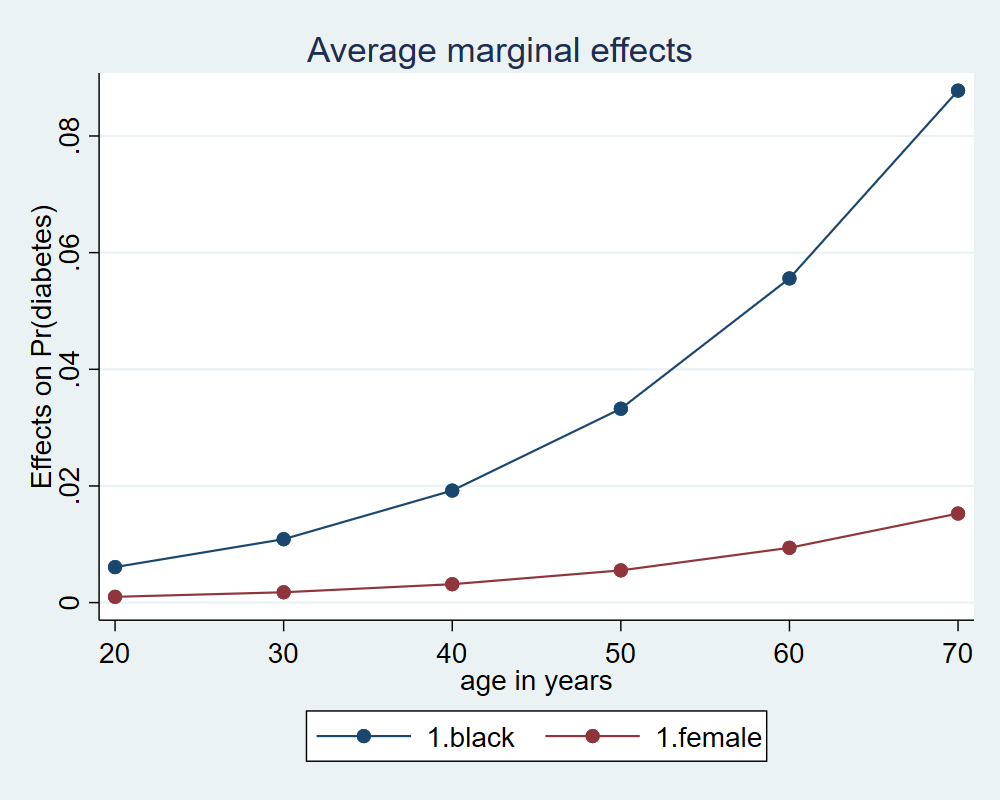

In [39]:
%%stata
quietly logit diabetes i.black i.female age,nolog
quietly margins, dydx(black female) at(age=(20 30 40 50 60 70)) vsquish
marginsplot,noci


## A more complicated example - Marginal effects of interaction terms


In [40]:
%%stata
. quietly logit diabetes i.black i.female age i.female#c.age,nolog
. margins female#black, at(age=(20 30 40 50 60 70)) vsquish


. . quietly logit diabetes i.black i.female age i.female#c.age,nolog

. . margins female#black, at(age=(20 30 40 50 60 70)) vsquish

Adjusted predictions                                    Number of obs = 10,335
Model VCE: OIM

Expression: Pr(diabetes), predict()
1._at: age = 20
2._at: age = 30
3._at: age = 40
4._at: age = 50
5._at: age = 60
6._at: age = 70

----------------------------------------------------------------------------------
                 |            Delta-method
                 |     Margin   std. err.      z    P>|z|     [95% conf. interval]
-----------------+----------------------------------------------------------------
_at#female#black |
          1 0 0  |    .003304      .0009     3.67   0.000       .00154    .0050681
          1 0 1  |    .006706   .0019396     3.46   0.001     .0029044    .0105076
          1 1 0  |   .0085838    .001651     5.20   0.000      .005348    .0118196
          1 1 1  |   .0173275   .0036582     4.74   0.000     .0101576    .0244

People often ask what the marginal effect of an interaction term is. Stata’s margins command replies: there isn’t one. You just have the marginal effects of the component terms. The value of the interaction term can’t change independently of the values of the component terms, so you can’t estimate a separate effect for the interaction.


In [41]:
%%stata
quietly logit diabetes i.black i.female age i.female#c.age,nolog
margins, dydx(*) 


. quietly logit diabetes i.black i.female age i.female#c.age,nolog

. margins, dydx(*)

Average marginal effects                                Number of obs = 10,335
Model VCE: OIM

Expression: Pr(diabetes), predict()
dy/dx wrt:  1.black 1.female age

------------------------------------------------------------------------------
             |            Delta-method
             |      dy/dx   std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
     1.black |   .0396176   .0086693     4.57   0.000      .022626    .0566092
    1.female |   .0067791   .0041302     1.64   0.101     -.001316    .0148743
         age |   .0026632   .0001904    13.99   0.000     .0022901    .0030364
------------------------------------------------------------------------------
Note: dy/dx for factor levels is the discrete change from the base level.



## A few other points
- Margins would also give the wrong answers if you did not use factor variables. You should use margins because older commands, like adjust and mfx, do not support the use of factor variables

- Margins supports the use of the svy: prefix with svyset data. Some older commands do not.
- Margins is, unfortunately, more difficult to use with multiple-outcome commands like ologit or mlogit. But this is also true of many older commands.
- Many of Long & Freese’s spost9 commands continue to be very helpful, and are being updated to take advantage of the new capabilities contained in margins.
References

##	其他測試


In [42]:
%%stata
use https://rmilab.nkust.edu.tw/files/bookdata/lecture/nhanes2f.dta,clear
logit diabetes i.black i.female age,nolog //i.female#c.age,nolog
margins, dydx(*) 
margins black
* margins ,at(black=(0 1)) //上面的指令,等同於

. use https://rmilab.nkust.edu.tw/files/bookdata/lecture/nhanes2f.dta,clear

. logit diabetes i.black i.female age,nolog

Logistic regression                                     Number of obs = 10,335
                                                        LR chi2(3)    = 374.17
                                                        Prob > chi2   = 0.0000
Log likelihood = -1811.9828                             Pseudo R2     = 0.0936

------------------------------------------------------------------------------
    diabetes | Coefficient  Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
     1.black |   .7179046   .1268061     5.66   0.000     .4693691      .96644
    1.female |   .1545569   .0942982     1.64   0.101    -.0302642    .3393779
         age |   .0594654   .0037333    15.93   0.000     .0521484    .0667825
       _cons |  -6.405437   .2372224   -27.00   0.000    -6.870384    -5.94049
--------

In [43]:
%%stata

return list
 
matrix ff=r(b)
matrix list r(b)
di ff[1,2]-ff[1,1]

/*
> . matrix list e(b)
> 
> e(b)[1,6]
>       diabetes:   diabetes:   diabetes:   diabetes:   diabetes:   diabetes:
>             0b.          1.         0b.          1.                        
>          black       black      female      female         age       _cons
> y1           0   .71790456           0   .15455685   .05946543  -6.4054369
> 
*/
* 求出指令margins black 上(black=1)的.084417 
capture drop xby
capture drop pry
gen xby=_b[1.black]+_b[1.female]*female+_b[age]*age+_b[_cons]
gen pry = exp(xby)/(1+exp(xby))
sum pry
scalar black1_m = r(mean)
*求出指令margins black 上(black=0)的.0443197 
capture drop xby
capture drop pry
gen xby=_b[1.female]*female+_b[age]*age+_b[_cons]
gen pry = exp(xby)/(1+exp(xby))
sum pry
scalar black0_m = r(mean)
* 驗證margins, dydx(*),black 的係數
di black1_m-black0_m
* .04008792
* 驗證margins, dydx(*),age 的係數
* partial marginal effect = F(1-F)*beta_age ,F是logistic 分配的CDF,因此密度函數f=F'=F(1-F)
capture drop xby
capture drop pry
predict xby,xb 
gen pry = exp(xby)/(1+exp(xby))
gen pyage=pry*(1-pry)*_b[age]
sum pyage 

sum pyage if e(sample)

. return list

macros:
               r(name) : "<unnamed>"
               r(type) : "text"
             r(status) : "on"
           r(filename) : "C:\Users\linchao\.ipython\stata\log_main.txt"

.  
. matrix ff=r(b)

. matrix list r(b)
matrix r(b) not found
r(111);

. di ff[1,2]-ff[1,1]
.

. 
. 
. capture drop xby

. capture drop pry

. gen xby=_b[1.black]+_b[1.female]*female+_b[age]*age+_b[_cons]

. gen pry = exp(xby)/(1+exp(xby))

. sum pry

    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
         pry |     10,337    .0844076    .0663899   .0110063   .2436938

. scalar black1_m = r(mean)

. capture drop xby

. capture drop pry

. gen xby=_b[1.female]*female+_b[age]*age+_b[_cons]

. gen pry = exp(xby)/(1+exp(xby))

. sum pry

    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
         pry |     10,3